Saving election_data.xlsx to election_data (1).xlsx
File uploaded successfully!
Data shape: (220, 17)
     region  population  literacy_rate  average_income  youth_percentage  \
0  Region_1      429403          86.23          781883             35.93   
1  Region_2      555075          62.72          209670             58.39   
2  Region_3      840575          79.09          686231             54.77   
3  Region_4      865599          91.00          326968             36.91   
4  Region_5      227884          67.13          423194             45.33   

   urban_percentage previous_winner  party_a_campaign_spend  \
0             26.21         Party A                   14.35   
1             76.66         Party D                   35.10   
2             63.68         Party D                   30.87   
3             76.75         Party D                   87.23   
4             80.77         Party C                   34.65   

   party_b_campaign_spend  party_c_campaign_spend  party_d_cam

,precision,recall,f1-score,support
0,0.750000,0.818182,0.782609,11.000000
1,0.750000,0.500000,0.600000,6.000000
2,0.888889,0.888889,0.888889,9.000000
3,0.555556,0.714286,0.625000,7.000000
4,0.900000,0.818182,0.857143,11.000000
accuracy,0.772727,0.772727,0.772727,0.772727
macro avg,0.768889,0.747908,0.750728,44.000000
weighted avg,0.784975,0.772727,0.773006,44.000000


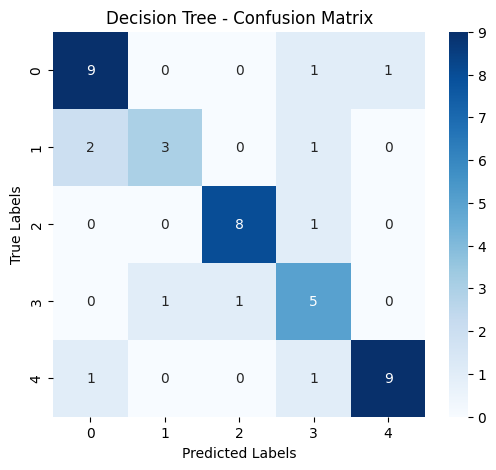


 Random Forest Accuracy: 81.82%


,precision,recall,f1-score,support
0,0.818182,0.818182,0.818182,11.000000
1,0.800000,0.666667,0.727273,6.000000
2,0.818182,1.000000,0.900000,9.000000
3,0.625000,0.714286,0.666667,7.000000
4,1.000000,0.818182,0.900000,11.000000
accuracy,0.818182,0.818182,0.818182,0.818182
macro avg,0.812273,0.803463,0.802424,44.000000
weighted avg,0.830424,0.818182,0.818871,44.000000


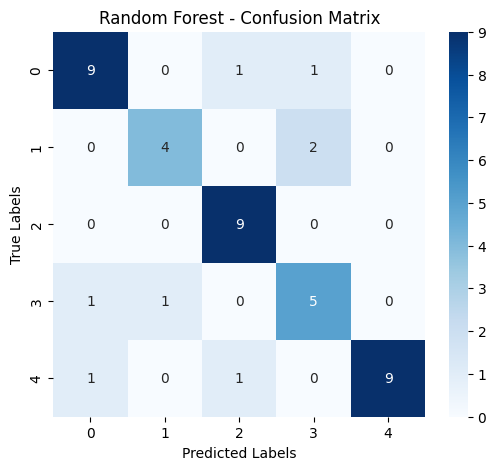


 Logistic Regression Accuracy: 88.64%


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.666667,0.800000,6.000000
2,0.750000,1.000000,0.857143,9.000000
3,0.714286,0.714286,0.714286,7.000000
4,1.000000,0.909091,0.952381,11.000000
accuracy,0.886364,0.886364,0.886364,0.886364
macro avg,0.892857,0.858009,0.864762,44.000000
weighted avg,0.903409,0.886364,0.886147,44.000000


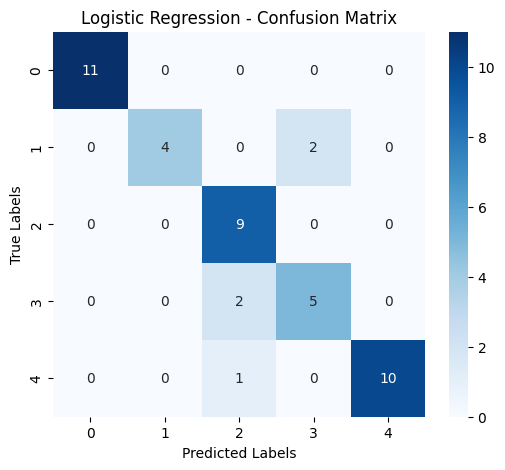

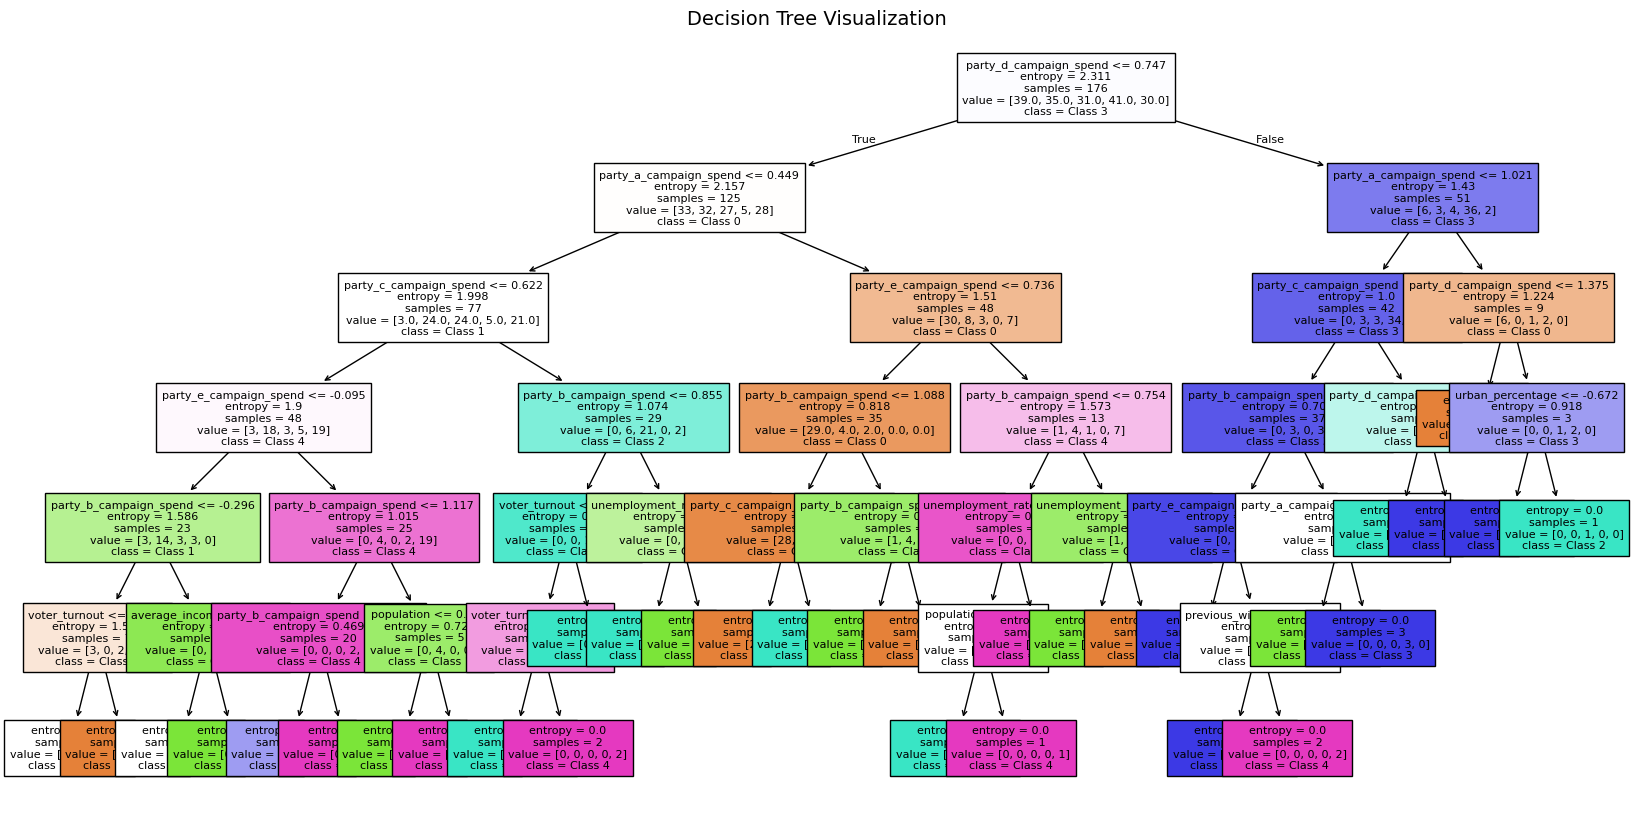

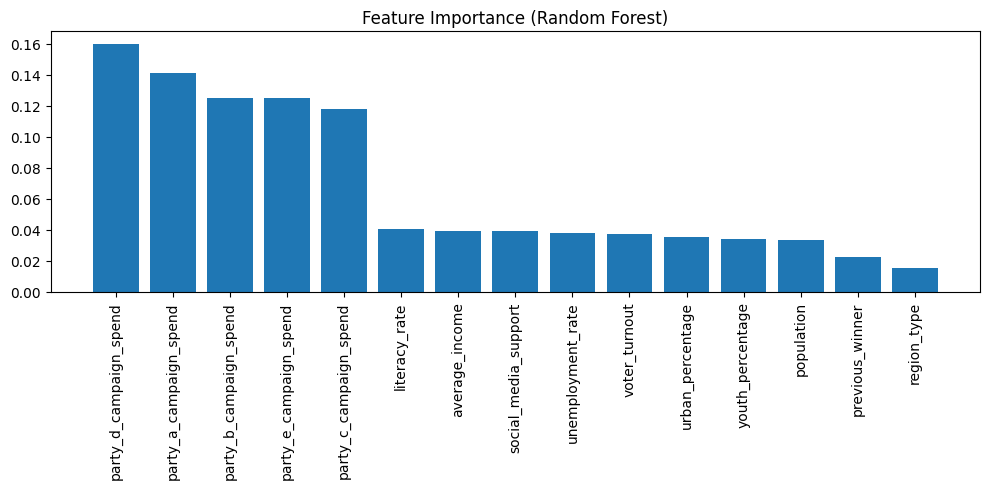


 Model Comparison Summary:
                 Model  Accuracy (%)
0        Decision Tree         77.27
1        Random Forest         81.82
2  Logistic Regression         88.64


In [ ]:
'''TITLE: Predictive Analysis of Election Outcomes Using Machine Learning'''
#TAGLINE:“A Comparative Study Using Decision Tree, Random Forest, and Logistic Regression”
# Haritha R(Project - 3)
#  STEP 1: Upload Excel File

from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Read uploaded Excel file(HR)
file_name = list(uploaded.keys())[0]
data = pd.read_excel(io.BytesIO(uploaded[file_name]))

print("File uploaded successfully!")
print("Data shape:", data.shape)
print(data.head())


# STEP 2: Data Preprocessing

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in ["region_type", "previous_winner", "current_winner"]:
    data[col] = le.fit_transform(data[col])

X = data.drop(["region", "current_winner"], axis=1)
y = data["current_winner"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#  STEP 3: Split Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


#  STEP 4: Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)


# STEP 5: Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


#  STEP 6: Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000, random_state=42) # Increased max_iter
lr_model.fit(X_train, y_train)


# STEP 7: Evaluate All Models + Confusion Matrix + F1 Scores

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Logistic Regression": lr_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"\n {name} Accuracy: {acc:.2f}%")

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    display(report_df)

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


#  STEP 8: Decision Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=[f"Class {i}" for i in sorted(y.unique())],
    fontsize=8
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


# STEP 9: Feature Importance (Random Forest)
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# STEP 10: Model Comparison Summary
summary = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    summary[name] = round(accuracy_score(y_test, y_pred)*100, 2)

summary_df = pd.DataFrame(list(summary.items()), columns=["Model", "Accuracy (%)"])
print("\n Model Comparison Summary:")
print(summary_df)